In [9]:
from grpc.beta import implementations
from tensorflow_serving.apis import predict_pb2
from tensorflow_serving.apis import prediction_service_pb2
from tensorflow_serving.apis import inference_pb2
from tensorflow.keras.preprocessing import image as keras_image
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input as xpreprocess_input
from tensorflow.python.framework import tensor_util
import re
import os
import time
import numpy as np
import tensorflow as tf
import numpy as np
import pandas as pd 
from glob import glob
from random import choice,sample
import matplotlib.pyplot as plt
import pickle

from PIL import Image

In [2]:
channel = implementations.insecure_channel("localhost",4561)
stub = prediction_service_pb2.beta_create_PredictionService_stub(channel)

/home/mukul/py36/lib/python3.6/site-packages/tensorflow_serving/apis/prediction_service_pb2.py:131: DeprecationWarning: beta_create_PredictionService_stub() method is deprecated. This method will be removed in near future versions of TF Serving. Please switch to GA gRPC API in prediction_service_pb2_grpc.
  'prediction_service_pb2_grpc.', DeprecationWarning)


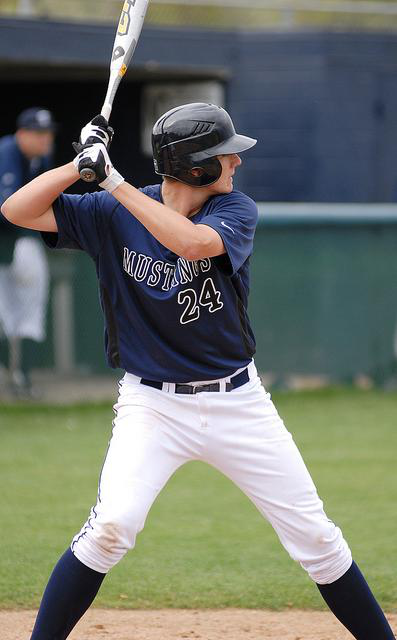

In [11]:
with open('test_images/4711_423953.jpg' , 'rb') as f:
    data = f.read()
    
Image.open('test_images/4711_423953.jpg') # just for display 

In [4]:
model_name="xception"
input_tensor="input"

request = predict_pb2.PredictRequest()
request.model_spec.name = model_name
request.model_spec.signature_name = 'datax'

In [5]:
request.inputs[input_tensor].CopyFrom(tf.contrib.util.make_tensor_proto(data))


For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
If you depend on functionality not listed there, please file an issue.



/home/mukul/py36/lib/python3.6/site-packages/tensorflow/contrib/lite/python/__init__.py:26: PendingDeprecationWarning: WARNING: TF Lite has moved from tf.contrib.lite to tf.lite. Please update your imports. This will be a breaking error in TensorFlow version 2.0.
  _warnings.warn(WARNING, PendingDeprecationWarning)


In [6]:
result = stub.Predict(request, 30)
re1 = tensor_util.MakeNdarray(result.outputs['output'])

In [7]:
with open('imagenet_map.pickle', 'rb') as handle:
    imagenet_class_map = pickle.load(handle)

In [8]:
imagenet_class_map[np.argmax(re1)]

'ballplayer, baseball player'